![](./graphs/dl_banner.jpg)

# 用tensorflow low level API构建线性回归模型
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

## 1.引入工具库

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import numpy.random as rnd

## 2.设定超参数

In [2]:
# 设定各种参数
learning_rate = 0.01  # 学习率
training_epochs = 1000 # 迭代轮次
display_step = 50 # 信息展示间隔轮次

## 3.准备数据，设定参数变量

In [3]:
# 给定一组训练数据
train_X = numpy.asarray([2.3,4.3,5.6,6.3,6.9,4.3,9.9,6.15,7.59,2.167,
                         7.4,10.9,5.3,7.9,5.4,9.2,3.1])
train_Y = numpy.asarray([1.3,2.76,2.09,3.01,1.9,1.7,3.6,2.6,2.5,1.2,
                         2.8,3.5,1.5,2.9,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# 占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")

# 设定模型权重
W = tf.Variable(rnd.randn(), name="weight")
b = tf.Variable(rnd.randn(), name="bias")

## 4.完成模型构建
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

In [5]:
# 构建线性回归
# 想想线性回归是不是y=WX+b的形式
pred = tf.add(tf.multiply(X, W), b)

## 5.计算损失与优化器设定

In [6]:
# 计算损失函数
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# 梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# 初始化计算图中的变量（用默认值去赋值）
init = tf.global_variables_initializer()

## 6.在session当中完成计算图计算(损失计算与优化、参数更新迭代)
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

第0050轮 损失函数值为 0.146962970 当前的W为 0.4043282 当前的b为 -0.3015547
第0100轮 损失函数值为 0.137493134 当前的W为 0.39482716 当前的b为 -0.23303623
第0150轮 损失函数值为 0.129218936 当前的W为 0.38594535 当前的b为 -0.16898352
第0200轮 损失函数值为 0.121989548 当前的W为 0.37764236 当前的b为 -0.109105416
第0250轮 损失函数值为 0.115673073 当前的W为 0.3698806 当前的b为 -0.053129945
第0300轮 损失函数值为 0.110154413 当前的W为 0.3626246 当前的b为 -0.0008026183
第0350轮 损失函数值为 0.105332755 当前的W为 0.35584158 当前的b为 0.048114374
第0400轮 损失函数值为 0.101120234 当前的W为 0.3495005 当前的b为 0.09384317
第0450轮 损失函数值为 0.097439878 当前的W为 0.34357285 当前的b为 0.13659164
第0500轮 损失函数值为 0.094224572 当前的W为 0.33803156 当前的b为 0.17655389
第0550轮 损失函数值为 0.091415606 当前的W为 0.33285135 当前的b为 0.21391164
第0600轮 损失函数值为 0.088961683 当前的W为 0.32800883 当前的b为 0.24883454
第0650轮 损失函数值为 0.086817950 当前的W为 0.32348177 当前的b为 0.28148144
第0700轮 损失函数值为 0.084945254 当前的W为 0.31924996 当前的b为 0.31200072
第0750轮 损失函数值为 0.083309427 当前的W为 0.3152937 当前的b为 0.34053057
第0800轮 损失函数值为 0.081880488 当前的W为 0.31159556 当前的b为 0.36720088
第0850轮 损失函数值为 0.080632299 当前的W为 0.3

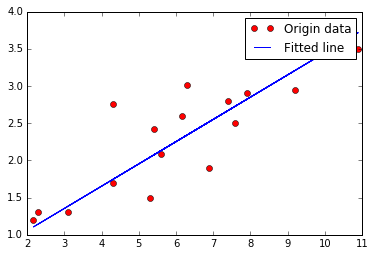

In [8]:
# 真正的训练过程
with tf.Session() as sess:
    sess.run(init)

    # 拟合训练数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # 每个epoch(完整的数据过一遍)之后输出信息
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "第%04d轮" % (epoch+1), "损失函数值为", "{:.9f}".format(c), \
                "当前的W为", sess.run(W), "当前的b为", sess.run(b)

    print "训练完成"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "训练集损失为", training_cost, "最终的W为", sess.run(W), "最终的b为", sess.run(b), '\n'

    #用matplotlib画一下原始数据点与拟合出来的直线
    plt.plot(train_X, train_Y, 'ro', label='Origin data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

### 版权归 © 稀牛学院 所有 保留所有权利
![](./graphs/xiniu_neteasy.png)